In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB




import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("titanic_train.csv")
df 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
print(df.shape)
df.info()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe(include=["object"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Ilmakangas, Miss. Pieta Sofia",male,1601,G6,S
freq,1,577,7,4,644


In [5]:
df.describe(include=["object"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Ilmakangas, Miss. Pieta Sofia",male,1601,G6,S
freq,1,577,7,4,644


In [6]:
df["Survived"]=df["Survived"].map({1:'yes', 0:'no'})
df["Survived"].value_counts()

no     549
yes    342
Name: Survived, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

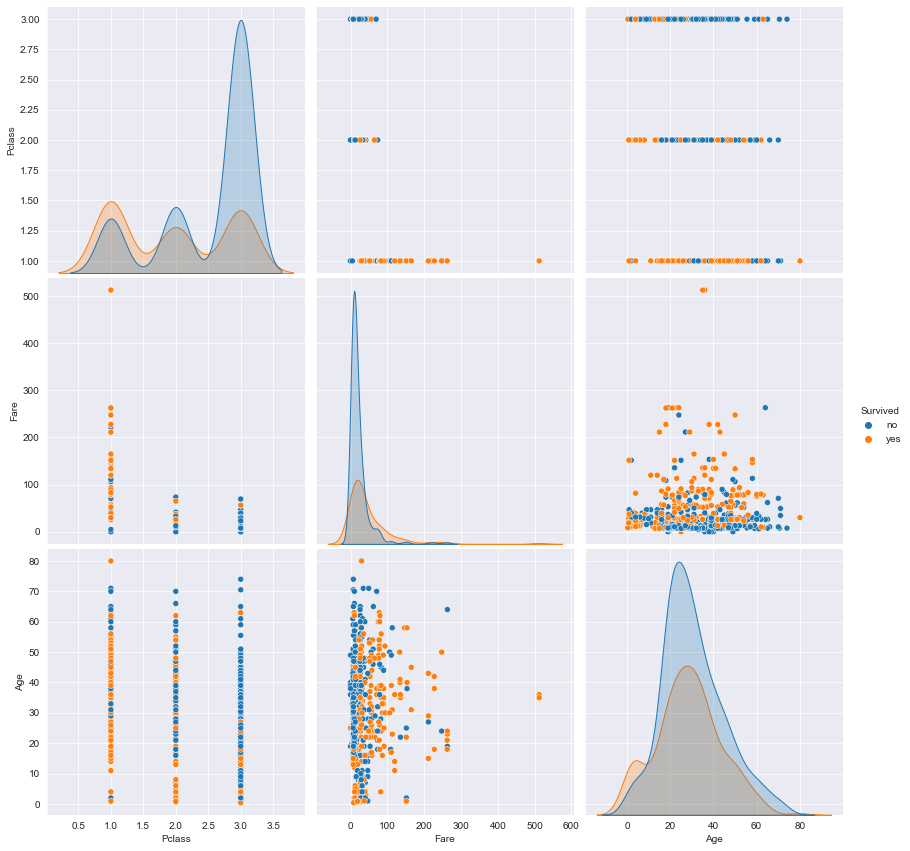

In [7]:
sns.set_style("darkgrid");
sns.pairplot(df[["Survived","Pclass","Fare","Age"]], hue="Survived", size=4);
plt.show

<AxesSubplot:xlabel='Pclass', ylabel='count'>

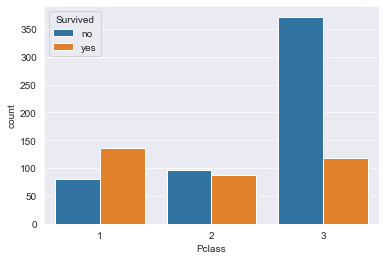

In [8]:
sns.countplot(df["Pclass"],hue=df["Survived"])

<AxesSubplot:xlabel='Parch', ylabel='count'>

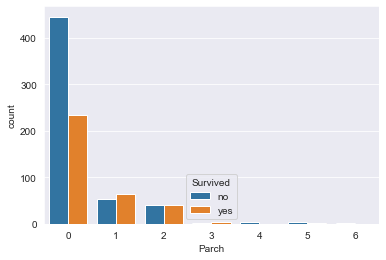

In [9]:
sns.countplot(df["Parch"],hue=df["Survived"])

<AxesSubplot:xlabel='Sex', ylabel='count'>

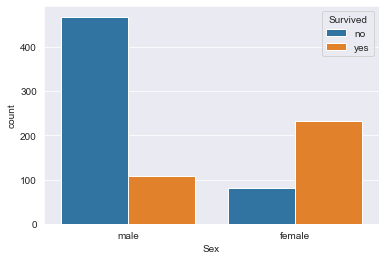

In [10]:
sns.countplot(df["Sex"],hue=df["Survived"])

<AxesSubplot:xlabel='Ticket', ylabel='count'>

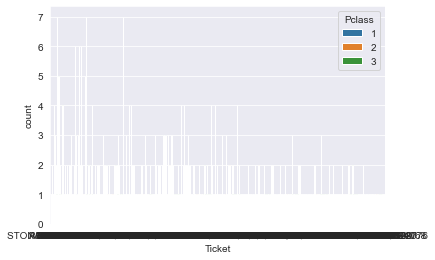

In [11]:
sns.countplot(df["Ticket"],hue=df["Pclass"])

<AxesSubplot:xlabel='Age', ylabel='count'>

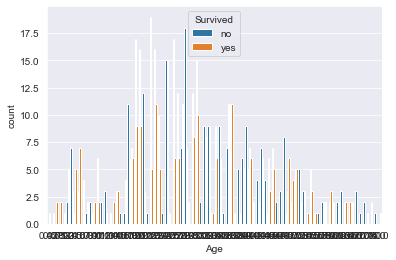

In [12]:
sns.countplot(df["Age"],hue=df["Survived"])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

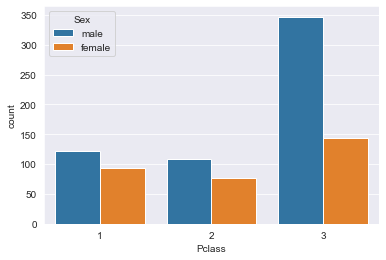

In [13]:
sns.countplot(df["Pclass"],hue=df["Sex"])

<AxesSubplot:xlabel='Parch', ylabel='count'>

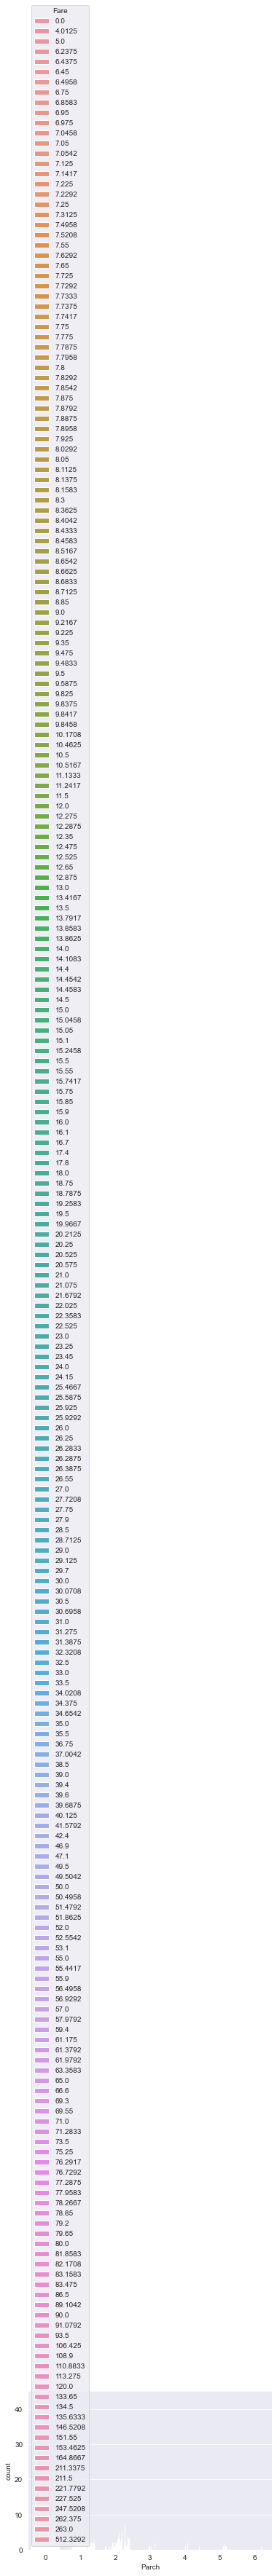

In [14]:
sns.countplot(df["Parch"],hue=df["Fare"])

<AxesSubplot:xlabel='Sex', ylabel='count'>

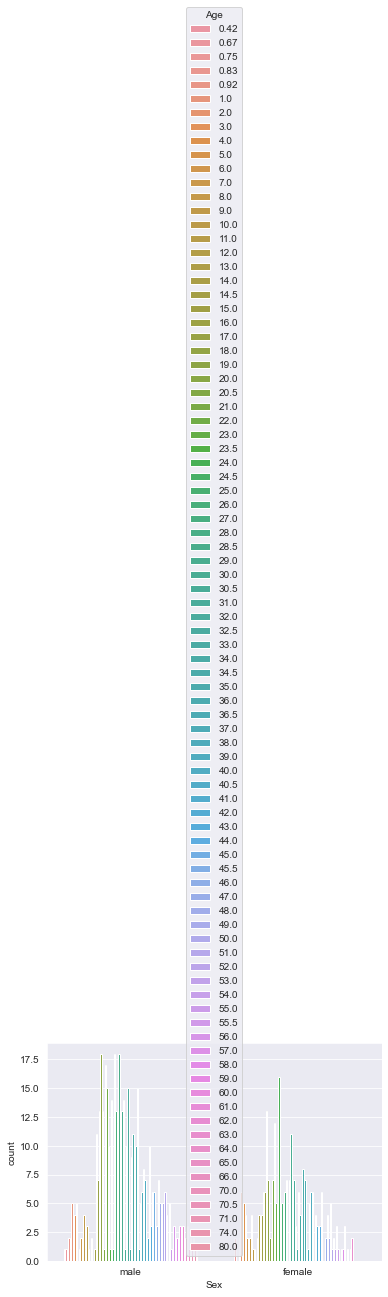

In [15]:
sns.countplot(df["Sex"],hue=df["Age"])

<AxesSubplot:>

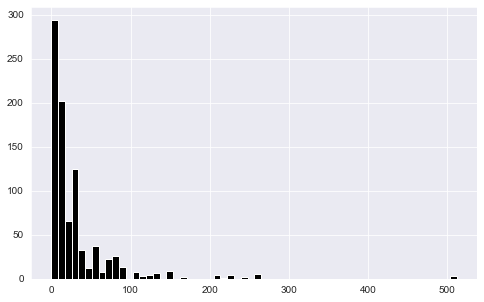

In [16]:
df["Fare"].hist(color='Black',bins=60,figsize=(8,5))


<AxesSubplot:>

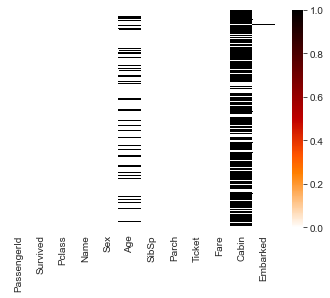

In [17]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="gist_heat_r")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

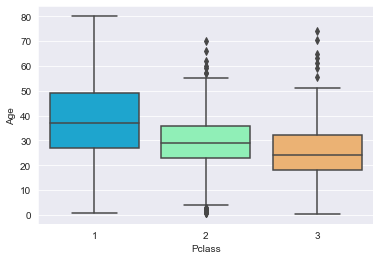

In [18]:
sns.boxplot(x="Pclass",y="Age",data=df,palette="rainbow")

In [19]:
def impute_age(cols):
        Age=cols[0]
        Pclass=cols[1]
        
        if pd.isnull(Age):
            if Pclass==1:
                return 36
            elif Pclass ==2:
                return 28
            else:
                return 23
        return Age

In [20]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

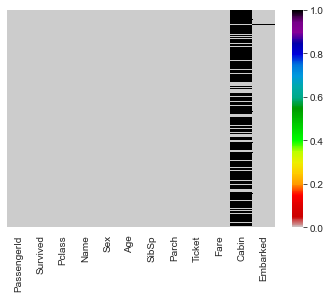

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="nipy_spectral_r")

In [22]:
df.drop('Cabin',inplace=True,axis=1)

<AxesSubplot:>

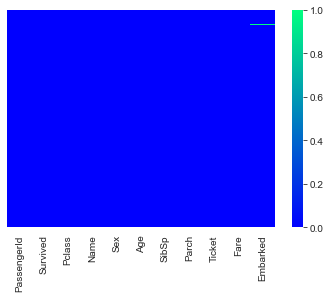

In [23]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="winter")

In [24]:
embark=pd.get_dummies(df['Embarked'],drop_first=True)
sex=pd.get_dummies(df['Sex'],drop_first=True)

<AxesSubplot:>

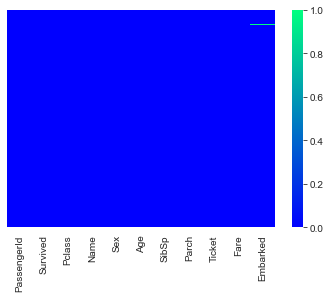

In [25]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="winter")

In [26]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,no,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,no,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,no,3,"Moran, Mr. James",male,23.0,0,0,330877,8.4583,Q
6,7,no,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,no,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,yes,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [27]:
df.drop(['Ticket','Name','Fare'],axis=1,inplace=True)

In [28]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,no,3,male,22.0,1,0,S
1,2,yes,1,female,38.0,1,0,C
2,3,yes,3,female,26.0,0,0,S
3,4,yes,1,female,35.0,1,0,S
4,5,no,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...,...
886,887,no,2,male,27.0,0,0,S
887,888,yes,1,female,19.0,0,0,S
888,889,no,3,female,23.0,1,2,S
889,890,yes,1,male,26.0,0,0,C


In [29]:
df=pd.concat([df,sex,embark],axis=1)

In [30]:
df.drop(['Sex','Embarked'],axis=1,inplace=True)

In [31]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,1,no,3,22.0,1,0,1,0,1
1,2,yes,1,38.0,1,0,0,0,0
2,3,yes,3,26.0,0,0,0,0,1
3,4,yes,1,35.0,1,0,0,0,1
4,5,no,3,35.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,887,no,2,27.0,0,0,1,0,1
887,888,yes,1,19.0,0,0,0,0,1
888,889,no,3,23.0,1,2,0,0,1
889,890,yes,1,26.0,0,0,1,0,0


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('Survived',axis=1),df['Survived'],
test_size=0.50,random_state=101)

In [39]:
logmodel=LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [40]:
predictions=logmodel.predict(X_test)

In [44]:
predictions

array(['no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes',
       'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes',
       'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no',
       'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes',
       'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes',
       'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       '

In [42]:
from sklearn.metrics import accuracy_score


In [43]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8071748878923767